<a href="https://colab.research.google.com/github/Trickshotblaster/nn-practices/blob/main/PracticeCharNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import torch

In [190]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [191]:
mytensor = torch.randn(5, 5).to(device)

i have some ideas i wanna try

In [192]:
mytensor.cpu()

tensor([[ 0.0795, -1.7948, -0.0780,  0.8381, -0.0595],
        [-0.3190, -0.6545, -0.9096, -1.8340, -0.2699],
        [ 1.5970,  0.1319,  2.1338,  0.5839,  0.9573],
        [ 0.6841, -0.2651, -0.1495, -0.3459,  1.7350],
        [-0.2856, -0.9763,  1.2581, -1.1817, -1.2226]])

In [193]:
class NeuralNet:
  def __init__(self, inputSize=10, hiddenSizes=[400, 200, 300, 100], memorySize=100):
    self.C = torch.randn(len(stoi), 10)
    self.memoryMat = torch.randn(memorySize, memorySize, requires_grad=True).to(device)
    self.hiddens = [torch.randn(inputSize, hiddenSizes[0], requires_grad=True).to(device) / (inputSize ** 0.5)]
    self.biases = [torch.randn(hiddenSizes[0], requires_grad=True).to(device)]
    for last, size in zip(hiddenSizes, hiddenSizes[1:]):
      self.hiddens.append(torch.randn(last, size, requires_grad=True).to(device) / (last ** 0.5))
      self.biases.append(torch.randn(size, requires_grad=True).to(device) * 0.01)
    self.params = [weight.detach() for weight in self.hiddens]
    self.params.extend([bias.detach() for bias in self.biases])
    self.input_size = inputSize
  def __call__(self, input):
    input = input.to(device)
    out = (input @ self.hiddens[0] + self.biases[0]).tanh()
    for layer, bias in zip(self.hiddens[1:], self.biases[1:]):
      out = (out @ layer + bias).tanh()
    return out

In [194]:
mynet = NeuralNet(inputSize=3)

In [195]:
[x.shape for x in mynet.hiddens]

[torch.Size([3, 400]),
 torch.Size([400, 200]),
 torch.Size([200, 300]),
 torch.Size([300, 100])]

In [196]:
mynet(torch.randn(mynet.input_size))

tensor([ 0.2744, -0.2114,  0.0494,  0.2096, -0.0368, -0.0592, -0.2753, -0.0823,
        -0.1868, -0.2632,  0.0230,  0.3963, -0.2277,  0.6267, -0.1523, -0.4881,
         0.4808,  0.4478, -0.0219,  0.2510, -0.0067,  0.4300,  0.3539, -0.6971,
         0.2354,  0.1946, -0.6704, -0.4525,  0.6747, -0.1751, -0.4367,  0.0892,
         0.1731, -0.6084,  0.1039, -0.5919, -0.6999, -0.8077, -0.0138, -0.3309,
        -0.3875,  0.1301,  0.5212,  0.1310,  0.3019, -0.2368, -0.0727,  0.1877,
         0.0665, -0.3524,  0.3775, -0.2921,  0.3025, -0.1086, -0.0865,  0.4343,
        -0.3391, -0.2388, -0.1536,  0.2151, -0.0242,  0.1895,  0.0899, -0.1127,
        -0.4980,  0.3655,  0.5747, -0.1616, -0.4859,  0.5254, -0.0217, -0.2817,
         0.1751,  0.3129, -0.3040,  0.6655,  0.0012,  0.0953, -0.2560,  0.4999,
        -0.2295, -0.2053, -0.2380,  0.3535,  0.1161, -0.2789, -0.3405, -0.3941,
         0.1117, -0.4743,  0.1578, -0.6628, -0.0187, -0.3941,  0.1302,  0.2196,
        -0.3226, -0.0446,  0.3629,  0.26

(array([ 2., 13., 11., 18., 13., 16., 10.,  8.,  6.,  3.]),
 array([-0.80917692, -0.64515138, -0.4811258 , -0.31710023, -0.15307467,
         0.01095089,  0.17497645,  0.33900201,  0.50302756,  0.66705316,
         0.83107871]),
 <BarContainer object of 10 artists>)

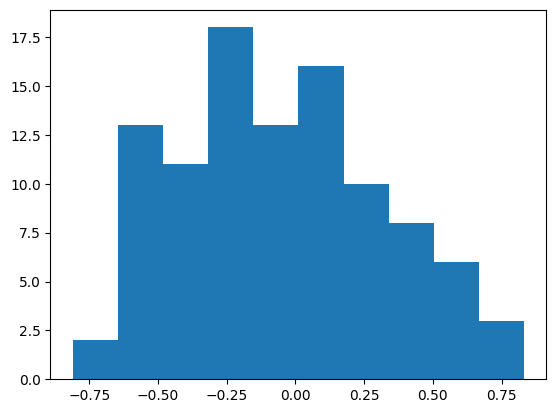

In [197]:
import matplotlib.pyplot as plt

plt.hist(mynet(torch.randn(mynet.input_size).to(device)).detach().cpu().flatten().numpy())

ok watch this

In [198]:
my_dataset = "skibidi"
vocab = ["."] + sorted(list(set(my_dataset)))
stoi = {char:i for i, char in enumerate(vocab)}
itos = {i:char for i, char in enumerate(vocab)}


In [199]:
stoi["."]

0

In [200]:
itos[0]

'.'

In [201]:
def make_dataset(text, context_len=mynet.input_size):
  xs, ys = [], []
  context = [0] * context_len
  splitwords = text.split()
  for word in splitwords:
    word = "." + word + "."
    for last, char in zip(word, word[1:]):
      context = context[1:] + [stoi[last]]
      xs.append(context)
      ys.append(stoi[char])
  return torch.Tensor(xs).to(device), torch.tensor(ys).to(device)

In [202]:
Xs, Ys = make_dataset(my_dataset, mynet.input_size)

In [203]:
Xs

tensor([[0., 0., 0.],
        [0., 0., 5.],
        [0., 5., 4.],
        [5., 4., 3.],
        [4., 3., 1.],
        [3., 1., 3.],
        [1., 3., 2.],
        [3., 2., 3.]], device='cuda:0')

In [204]:
Ys

tensor([5, 4, 3, 1, 3, 2, 3, 0], device='cuda:0')

In [205]:
train_len = len(Xs)

In [206]:
[param.is_leaf for param in mynet.params]

[True, True, True, True, True, True, True, True]

In [207]:
num_epochs = 10000
lr = 0.1
batch_size = 16
optimizer = torch.optim.SGD(mynet.params, lr)

In [208]:
import torch.nn.functional as F

In [211]:
for epoch in range(num_epochs):
  batch_indices = torch.randint(0, train_len-1, (batch_size,))
  xs = Xs[batch_indices]
  ys = Ys[batch_indices]

  out = mynet(xs)
  loss = F.cross_entropy(out, ys)

  for p in mynet.params:
    p.grad = None

  loss.backward()

  optimizer.step()

  if epoch % 1000 == 0:
    print(loss.item())

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.